In [1]:
from qiskit import *
%matplotlib inline
from qiskit.tools.visualization import plot_histogram

In [17]:
secretnumber = '1010101010101110101000001010101'

In [18]:
#circuit = QuantumCircuit(6+1,6)
circuit = QuantumCircuit(len(secretnumber)+1,len(secretnumber)) 
# the n+1 qubits are indexed 0...n, so the last qubit is index n

# Step 1 - range(n+1) returns [0,1,2,...,n] in Python. This covers all the qubits
circuit.h(range(len(secretnumber)))
#circuit.h([0,1,2,3,4,5])

#circuit.x(6)
#circuit.h(6)

circuit.x(len(secretnumber))
circuit.h(len(secretnumber))

circuit.barrier()

#circuit.cx(5,6)
#circuit.cx(3,6)
#circuit.cx(0,6)

# Step 2
for ii, yesno in enumerate(reversed(secretnumber)):
    if yesno == '1': 
        circuit.cx(ii,len(secretnumber))

circuit.barrier()

# Step 3  range(n+1) returns [0,1,2,...,n] in Python. This covers all the qubits
#circuit.h([0,1,2,3,4,5])
circuit.h(range(len(secretnumber)))

circuit.barrier()

#circuit.measure([0,1,2,3,4,5],[0,1,2,3,4,5])
circuit.measure(range(len(secretnumber)),range(len(secretnumber))) 
# measure the qubits indexed from 0 to n-1 and store them into the classical bits indexed 0 to n-1

#The algorithm has four main parts.
# https://github.com/Qiskit/qiskit-community-tutorials/blob/master/Coding_With_Qiskit/ep6_Bernstein-Vazirani_Algorithm.ipynb

# 1 Initialize the first $n$ qubits in the state $\vert0\rangle$, and the last qubit in the 
#$\vert1\rangle$ state. In Qiskit, all qubits are initialized in the $\vert0\rangle$ state, 
#so we don't need to do anything to the first $n$ qubits. For the last qubit, we initialize 
# it to $\vert1\rangle$ state by applying an CX gate.

# 2 Apply Hadamard gates to all qubits.

# 3 Build the box containing the secret number (also known as an "oracle"). We will build it as a function that computes $s.x$ modulo 2 by applying $CX$ gates from the first $n$ qubits onto the last qubit whenever there is a $1$ in the secret number. We will do this in reverse order, meaning that the there will be a $CX$ gate from the $n$th qubit to the last qubit if the first bit of the secret number is 1.

# 4 Measure the first $n$ qubits in the Bell basis. This means applying Hadamard gates to the first $n$ qubits again before applying measurements. ##

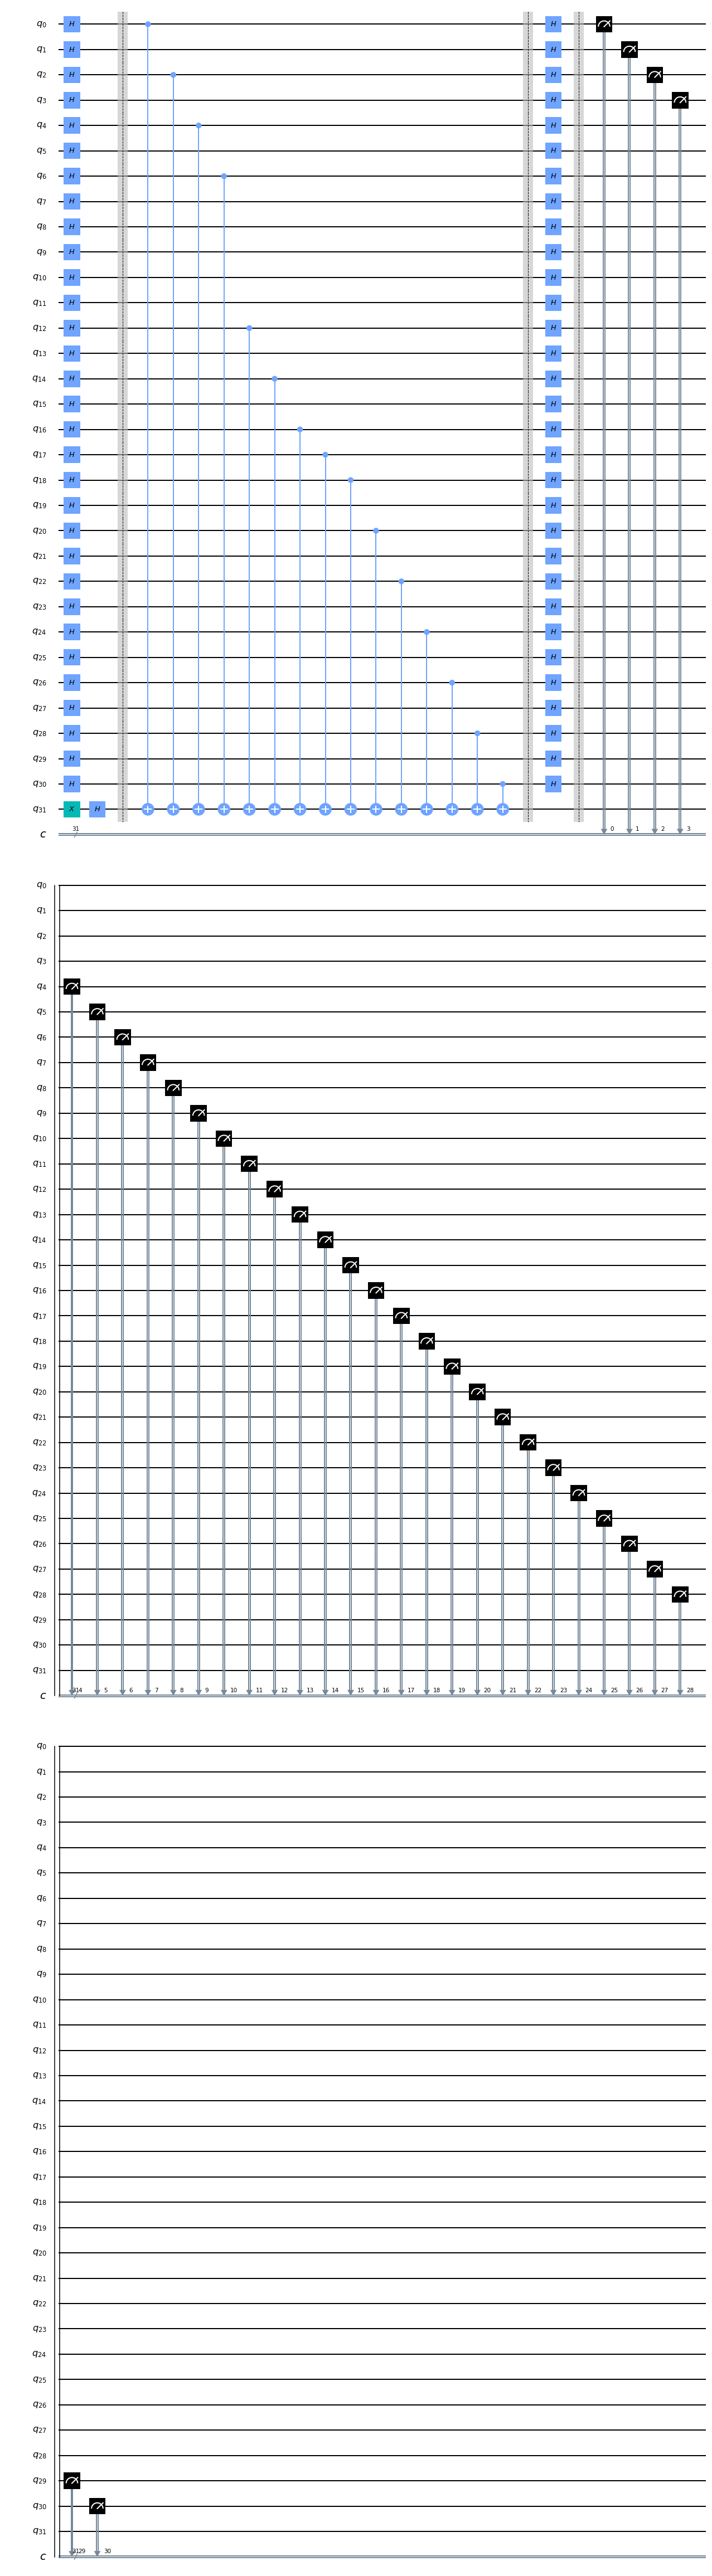

In [19]:
circuit.draw(output='mpl')

In [20]:
simulator = Aer.get_backend('qasm_simulator')
result = execute(circuit,backend = simulator, shots = 1).result()
counts = result.get_counts()
#print(result)
print(counts)
print("Great, You Have Found out the Secret Number:")


{'1010101010101110101000001010101': 1}
Great, You Have Found out the Secret Number:


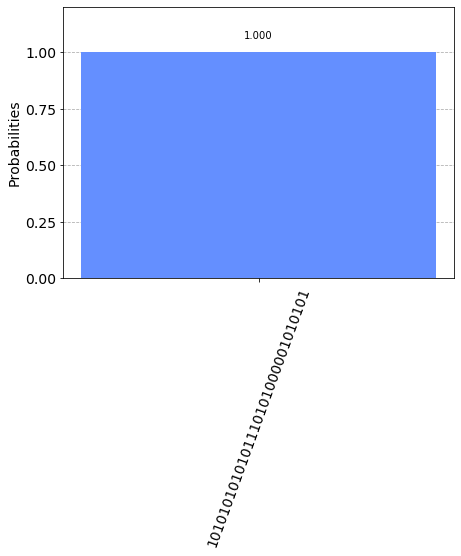

In [21]:
plot_histogram(result.get_counts(circuit))
